# Standardization

In [1]:
# Standardization is a part of feature scaling where we transrom our feature in such a way that there mean becomes 0 and standard deviation becomes 1

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("//Users//udayladdha//Desktop//DataSets//Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe() #  mean and std before scaling

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df=df.drop(columns=["Gender"])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=df.drop(columns="Purchased",axis=1)  
y=df["Purchased"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((320, 3), (80, 3), (320,), (80,))

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()

In [11]:
x_train_scaled=sc.fit_transform(x_train)   # we learn from only train data but we transform both of our test and train data
x_test_scaled=sc.transform(x_test)

In [12]:
x_test_scaled.mean(),x_train_scaled.std()

(-0.05435789184413622, 1.0)

In [13]:
x_train_scaled  # NOTE: StandardScaler works on a dataframe but returns a numpy array 

array([[ 0.75809717,  0.13566177,  0.25118967],
       [-1.14219777, -0.90926039, -0.34821895],
       [ 0.39539877,  0.42064054,  0.28116011],
       [-1.46759759,  0.32564761,  0.04139666],
       [-1.5678992 , -0.81426746, -0.70786412],
       [-0.23318577,  0.70561931,  0.25118967],
       [-1.19684581,  2.13051316, -1.09747972],
       [ 1.49439299, -0.90926039, -0.46810067],
       [ 0.78984892,  1.94052731, -1.42715446],
       [ 0.60934773,  1.94052731, -0.977598  ],
       [ 0.77883868,  0.70561931, -0.76780498],
       [-0.17952476, -1.09924623, -1.66691791],
       [-1.54820032, -0.62428162,  0.10133752],
       [-1.64402555, -0.24430992, -0.52804153],
       [-0.87136257,  0.13566177,  0.07136709],
       [ 0.31411485, -0.90926039, -1.15742058],
       [-0.44518848,  0.23065469, -0.40815981],
       [-0.78040298, -0.71927454,  1.36009562],
       [ 0.44445828,  0.99059808,  0.760687  ],
       [-0.59885916,  0.70561931, -1.45712489],
       [ 0.23461036, -0.24430992, -0.797

In [14]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [15]:
x_train_scaled # converted array into dataframe

,User ID,Age,EstimatedSalary
0,0.758097,0.135662,0.251190
1,-1.142198,-0.909260,-0.348219
2,0.395399,0.420641,0.281160
3,-1.467598,0.325648,0.041397
4,-1.567899,-0.814267,-0.707864
...,...,...,...
315,-1.630930,0.990598,1.809652
316,-0.397950,-0.624282,1.420036
317,-0.758508,-0.244310,-0.617953
318,1.199244,1.465563,-1.097480


In [16]:
x_train.describe()  # before scaling

,User ID,Age,EstimatedSalary
count,3.200000e+02,320.000000,320.000000
mean,1.569256e+07,37.571875,70618.750000
std,7.204570e+04,10.543587,33418.477399
min,1.556669e+07,18.000000,15000.000000
25%,1.562676e+07,29.000000,47000.000000
50%,1.569722e+07,37.000000,70000.000000
75%,1.575054e+07,45.000000,87250.000000
max,1.581524e+07,60.000000,150000.000000


In [17]:
np.round(x_train_scaled.describe(),1) # after scaling

,User ID,Age,EstimatedSalary
count,320.0,320.0,320.0
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-1.7,-1.9,-1.7
25%,-0.9,-0.8,-0.7
50%,0.1,-0.1,-0.0
75%,0.8,0.7,0.5
max,1.7,2.1,2.4


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

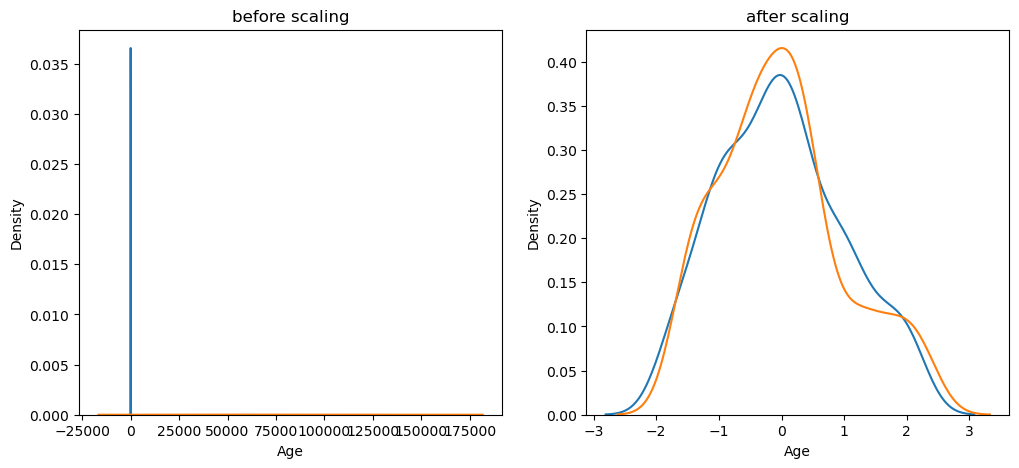

In [19]:
fig,(ax1,ax2)=plt.subplots(ncols=2 ,figsize=(12,5))

# before scaling
ax1.set_title("before scaling")
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)

# after scaling
ax2.set_title("after scaling")
sns.kdeplot(x_train_scaled["Age"],ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()